In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df_1 = pd.read_csv("C:\\Users\\Jordan\\OneDrive\\Desktop\\DataSci module CW\\data_640_validated.csv", encoding='latin1')

In [2]:
print(f'Shape of dataframe is {df_1.shape} (rows, columns)')

Shape of dataframe is (640, 96) (rows, columns)


In [3]:
df_1.head()

,Unnamed: 0,ï..O1,A1_1,A1_2,A2,A3,A4,A5,A6,A7,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
0,598,5/29/2020 8:11,Filipino,Asia,Male,Secondary school,A pet,11,Asian,"Single, never married",...,1,2,5,4,5,4,1,5,1,1
1,230,5/23/2020 1:54,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,2,5,4,2,4,1,4
2,232,5/23/2020 2:01,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,1,5,3,2,5,2,4
3,308,5/25/2020 1:34,Filipino,Asia,Female,High school,A pet,13,Asian,"Single, never married",...,3,2,3,4,5,5,2,5,1,2
4,231,5/23/2020 2:00,Mexican American,US/Canada,Male,Secondary school,A pet,14,Hispanic or Latino,"Single, never married",...,5,4,4,3,4,4,1,5,5,5


In [4]:
df_1.tail()

,Unnamed: 0,ï..O1,A1_1,A1_2,A2,A3,A4,A5,A6,A7,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
635,356,5/25/2020 5:42,British,EU,Female,Graduate school and higher,Both,48,White,Married or domestic partnership,...,1,2,4,3,4,4,2,3,1,1
636,416,5/25/2020 7:29,American,US/Canada,Female,Undergraduate school,A pet,49,White,Widowed,...,1,1,5,3,5,5,1,4,5,1
637,502,5/25/2020 17:34,USA,US/Canada,Female,Undergraduate school,A pet,55,White,Married or domestic partnership,...,2,1,4,4,5,5,1,5,2,2
638,549,5/26/2020 3:05,Filipino American,US/Canada,Female,Undergraduate school,Both,30s,Other,Married or domestic partnership,...,3,3,4,3,3,3,3,2,2,3
639,640,6/15/2020 18:51,Vietnamese,Asia,Female,Undergraduate school,NaN,sub 28,Asian,"Single, never married",...,1,1,2,3,3,2,1,2,1,1


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 96 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  640 non-null    int64 
 1   ï..O1       640 non-null    object
 2   A1_1        640 non-null    object
 3   A1_2        640 non-null    object
 4   A2          640 non-null    object
 5   A3          640 non-null    object
 6   A4          554 non-null    object
 7   A5          640 non-null    object
 8   A6          640 non-null    object
 9   A7          640 non-null    object
 10  A8          640 non-null    object
 11  B1          640 non-null    object
 12  B2          640 non-null    object
 13  B3          640 non-null    object
 14  C1          640 non-null    int64 
 15  C2          640 non-null    int64 
 16  C3          640 non-null    int64 
 17  C4          640 non-null    int64 
 18  C5          640 non-null    int64 
 19  C6          640 non-null    int64 
 20  C7        

In [6]:
df_renamed = df_1.rename(columns={
            'ï..O1' : 'date',
            'A1_1': 'nationality',
            'A1_2': 'reigion',
            'A2': 'gender',
            'A3': 'edu level',
            'A4': 'pet|garden',
            'A5': 'age',
            'A6': 'ethnicity',
            'A7': 'marital status',
            'A8': 'employment status',
            'B1': 'SelfI or SocDis',
            'B2': 'Length of SelfI/SocDis',
            'B3': 'Worry scale',
            'D3' : 'Playing frequency',
            'D4' : 'Hours within last 2 weeks',
            'D5' : 'Animal crossing frequency',
            'E1' : 'Catching bugs',
            'E2' : 'Fishing',
            'E3' : 'Planting Trees/Flowers',
            'E4' : 'Terraforming',
            'E5' : 'MI Tour participation',
            'E6' : 'Collect all Fish',
            'E7' : 'Collect all Bugs',
            'E8' : 'Plant all Trees',
            'E9' : 'Plant all Flowers',
            'E10' : 'Donate F/B to museum',
            'E11' : 'Show off F/B at home',
            'E12' : 'Sell F/B for profit',
            'E13' : 'Gift F/B to friends',
            'E14' : 'Release F/B to nature',
            'E15' : 'Plant new Tree',
            'E16' : 'Take Tree woods',
            'E17' : 'Cut down Tree',
            'E18' : 'Sell Tree for profit',
            'E19' : 'Save Tree for bug',
            'E20' : 'Plant Flowers',
            'E21' : 'Crossbread Flowers',
            'E22' : 'Show off Flowers',
            'E23' : 'Gift Flowers to friends',
            'E24' : 'Sell Flowers for profit',
            'E25' : 'MI find resource',
            'E26' : 'MI find villagers',
            'E27' : 'MI enjoy scenery',
            'E28' : 'MI new species',
            'F31' : 'ILCWTOW'})
    
df_renamed.head()


,Unnamed: 0,date,nationality,reigion,gender,edu level,pet|garden,age,ethnicity,marital status,...,F23,F24,F25,F26,F27,F28,F29,F30,ILCWTOW,F32
0,598,5/29/2020 8:11,Filipino,Asia,Male,Secondary school,A pet,11,Asian,"Single, never married",...,1,2,5,4,5,4,1,5,1,1
1,230,5/23/2020 1:54,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,2,5,4,2,4,1,4
2,232,5/23/2020 2:01,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,1,5,3,2,5,2,4
3,308,5/25/2020 1:34,Filipino,Asia,Female,High school,A pet,13,Asian,"Single, never married",...,3,2,3,4,5,5,2,5,1,2
4,231,5/23/2020 2:00,Mexican American,US/Canada,Male,Secondary school,A pet,14,Hispanic or Latino,"Single, never married",...,5,4,4,3,4,4,1,5,5,5


In [7]:
def column_finder(df):
    print(df.columns)
    column1 = input("Please enter your first column in the range:")
    column2 = input("Please enter your second column in the range:")
    print(f'\n Your range is', {df_renamed.columns.get_loc(column1)}, ':', {df_renamed.columns.get_loc(column2)})

column_finder(df_renamed)



Index(['Unnamed: 0', 'date', 'nationality', 'reigion', 'gender', 'edu level',
       'pet|garden', 'age', 'ethnicity', 'marital status', 'employment status',
       'SelfI or SocDis', 'Length of SelfI/SocDis', 'Worry scale', 'C1', 'C2',
       'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
       'C14', 'C15', 'D1', 'D2', 'Playing frequency',
       'Hours within last 2 weeks', 'Animal crossing frequency', 'D6', 'D7',
       'Catching bugs', 'Fishing', 'Planting Trees/Flowers', 'Terraforming',
       'MI Tour participation', 'Collect all Fish', 'Collect all Bugs',
       'Plant all Trees', 'Plant all Flowers', 'Donate F/B to museum',
       'Show off F/B at home', 'Sell F/B for profit', 'Gift F/B to friends',
       'Release F/B to nature', 'Plant new Tree', 'Take Tree woods',
       'Cut down Tree', 'Sell Tree for profit', 'Save Tree for bug',
       'Plant Flowers', 'Crossbread Flowers', 'Show off Flowers',
       'Gift Flowers to friends', 'Sell Flowers for pr

In [8]:
new_frame1 = df_renamed.drop(df_renamed.iloc[:, 14:31],axis = 1)
print(new_frame1.columns)

Index(['Unnamed: 0', 'date', 'nationality', 'reigion', 'gender', 'edu level',
       'pet|garden', 'age', 'ethnicity', 'marital status', 'employment status',
       'SelfI or SocDis', 'Length of SelfI/SocDis', 'Worry scale',
       'Playing frequency', 'Hours within last 2 weeks',
       'Animal crossing frequency', 'D6', 'D7', 'Catching bugs', 'Fishing',
       'Planting Trees/Flowers', 'Terraforming', 'MI Tour participation',
       'Collect all Fish', 'Collect all Bugs', 'Plant all Trees',
       'Plant all Flowers', 'Donate F/B to museum', 'Show off F/B at home',
       'Sell F/B for profit', 'Gift F/B to friends', 'Release F/B to nature',
       'Plant new Tree', 'Take Tree woods', 'Cut down Tree',
       'Sell Tree for profit', 'Save Tree for bug', 'Plant Flowers',
       'Crossbread Flowers', 'Show off Flowers', 'Gift Flowers to friends',
       'Sell Flowers for profit', 'MI find resource', 'MI find villagers',
       'MI enjoy scenery', 'MI new species', 'F1', 'F2', 'F3', 'F4'

In [9]:
new_frame5 = new_frame1.drop(new_frame1.loc[:, 'F1':'F30'],axis = 1)
new_frame5.columns 

Index(['Unnamed: 0', 'date', 'nationality', 'reigion', 'gender', 'edu level',
       'pet|garden', 'age', 'ethnicity', 'marital status', 'employment status',
       'SelfI or SocDis', 'Length of SelfI/SocDis', 'Worry scale',
       'Playing frequency', 'Hours within last 2 weeks',
       'Animal crossing frequency', 'D6', 'D7', 'Catching bugs', 'Fishing',
       'Planting Trees/Flowers', 'Terraforming', 'MI Tour participation',
       'Collect all Fish', 'Collect all Bugs', 'Plant all Trees',
       'Plant all Flowers', 'Donate F/B to museum', 'Show off F/B at home',
       'Sell F/B for profit', 'Gift F/B to friends', 'Release F/B to nature',
       'Plant new Tree', 'Take Tree woods', 'Cut down Tree',
       'Sell Tree for profit', 'Save Tree for bug', 'Plant Flowers',
       'Crossbread Flowers', 'Show off Flowers', 'Gift Flowers to friends',
       'Sell Flowers for profit', 'MI find resource', 'MI find villagers',
       'MI enjoy scenery', 'MI new species', 'ILCWTOW', 'F32'],
   

In [10]:
new_frame5 = new_frame5.drop(columns = ['Unnamed: 0', 'edu level', 'pet|garden', 'ethnicity', 'marital status', 'employment status', 
                                        'Worry scale', 'D6', 'D7', 'F32'])
new_frame5.columns

Index(['date', 'nationality', 'reigion', 'gender', 'age', 'SelfI or SocDis',
       'Length of SelfI/SocDis', 'Playing frequency',
       'Hours within last 2 weeks', 'Animal crossing frequency',
       'Catching bugs', 'Fishing', 'Planting Trees/Flowers', 'Terraforming',
       'MI Tour participation', 'Collect all Fish', 'Collect all Bugs',
       'Plant all Trees', 'Plant all Flowers', 'Donate F/B to museum',
       'Show off F/B at home', 'Sell F/B for profit', 'Gift F/B to friends',
       'Release F/B to nature', 'Plant new Tree', 'Take Tree woods',
       'Cut down Tree', 'Sell Tree for profit', 'Save Tree for bug',
       'Plant Flowers', 'Crossbread Flowers', 'Show off Flowers',
       'Gift Flowers to friends', 'Sell Flowers for profit',
       'MI find resource', 'MI find villagers', 'MI enjoy scenery',
       'MI new species', 'ILCWTOW'],
      dtype='object')

In [11]:
new_frame5.reset_index
new_frame5.head()

,date,nationality,reigion,gender,age,SelfI or SocDis,Length of SelfI/SocDis,Playing frequency,Hours within last 2 weeks,Animal crossing frequency,...,Plant Flowers,Crossbread Flowers,Show off Flowers,Gift Flowers to friends,Sell Flowers for profit,MI find resource,MI find villagers,MI enjoy scenery,MI new species,ILCWTOW
0,5/29/2020 8:11,Filipino,Asia,Male,11,Yes,More than a month,Almost everyday,Playing alot of video games do to the pandemic,1. Everyday,...,4,3,3,2,1,4,4,3,4,1
1,5/23/2020 1:54,American,US/Canada,Male,13,Yes,More than a month,Everyday,"6-7, hours, possibly more on occasion",2. Almost everyday,...,3,4,3,3,3,4,4,3,4,1
2,5/23/2020 2:01,American,US/Canada,Male,13,Yes,More than a month,Everyday,"6-7 hours, more on occasion",2. Almost everyday,...,3,4,3,4,3,4,4,4,4,2
3,5/25/2020 1:34,Filipino,Asia,Female,13,Yes,More than a month,Everyday,3-4 hours,1. Everyday,...,4,3,4,2,1,4,4,3,4,1
4,5/23/2020 2:00,Mexican American,US/Canada,Male,14,Yes,More than 3 weeks,Everyday,Somewhere in the 30 hour range,1. Everyday,...,3,2,2,2,2,4,3,2,2,5


In [12]:
new_frame5 = new_frame5.drop(columns = ['nationality', 'age', 'Hours within last 2 weeks'])
new_frame5.columns

Index(['date', 'reigion', 'gender', 'SelfI or SocDis',
       'Length of SelfI/SocDis', 'Playing frequency',
       'Animal crossing frequency', 'Catching bugs', 'Fishing',
       'Planting Trees/Flowers', 'Terraforming', 'MI Tour participation',
       'Collect all Fish', 'Collect all Bugs', 'Plant all Trees',
       'Plant all Flowers', 'Donate F/B to museum', 'Show off F/B at home',
       'Sell F/B for profit', 'Gift F/B to friends', 'Release F/B to nature',
       'Plant new Tree', 'Take Tree woods', 'Cut down Tree',
       'Sell Tree for profit', 'Save Tree for bug', 'Plant Flowers',
       'Crossbread Flowers', 'Show off Flowers', 'Gift Flowers to friends',
       'Sell Flowers for profit', 'MI find resource', 'MI find villagers',
       'MI enjoy scenery', 'MI new species', 'ILCWTOW'],
      dtype='object')

In [13]:
empty_values = (new_frame5 == ' ').sum()
print('The following columns contain empty values:')
print(f'\n{empty_values}')

The following columns contain empty values:

date                         0
reigion                      0
gender                       0
SelfI or SocDis              0
Length of SelfI/SocDis       0
Playing frequency            0
Animal crossing frequency    0
Catching bugs                0
Fishing                      0
Planting Trees/Flowers       0
Terraforming                 0
MI Tour participation        0
Collect all Fish             0
Collect all Bugs             0
Plant all Trees              0
Plant all Flowers            0
Donate F/B to museum         0
Show off F/B at home         0
Sell F/B for profit          0
Gift F/B to friends          0
Release F/B to nature        0
Plant new Tree               0
Take Tree woods              0
Cut down Tree                0
Sell Tree for profit         0
Save Tree for bug            0
Plant Flowers                0
Crossbread Flowers           0
Show off Flowers             0
Gift Flowers to friends      0
Sell Flowers for profit  

In [14]:
nan_values = (new_frame5.isna().sum())
print('The following columns contain NaN values:')
print(f'\n{nan_values}')

The following columns contain NaN values:

date                         0
reigion                      0
gender                       0
SelfI or SocDis              0
Length of SelfI/SocDis       0
Playing frequency            1
Animal crossing frequency    0
Catching bugs                0
Fishing                      0
Planting Trees/Flowers       0
Terraforming                 0
MI Tour participation        0
Collect all Fish             0
Collect all Bugs             0
Plant all Trees              0
Plant all Flowers            0
Donate F/B to museum         0
Show off F/B at home         0
Sell F/B for profit          0
Gift F/B to friends          0
Release F/B to nature        0
Plant new Tree               0
Take Tree woods              0
Cut down Tree                0
Sell Tree for profit         0
Save Tree for bug            0
Plant Flowers                0
Crossbread Flowers           0
Show off Flowers             0
Gift Flowers to friends      0
Sell Flowers for profit    

* Playing frequency            - 1
* Hours within last 2 weeks    - 1

In [15]:
new_frame5[new_frame5['Playing frequency'].isnull()]

,date,reigion,gender,SelfI or SocDis,Length of SelfI/SocDis,Playing frequency,Animal crossing frequency,Catching bugs,Fishing,Planting Trees/Flowers,...,Plant Flowers,Crossbread Flowers,Show off Flowers,Gift Flowers to friends,Sell Flowers for profit,MI find resource,MI find villagers,MI enjoy scenery,MI new species,ILCWTOW
443,5/26/2020 22:25,Asia,Female,Yes,More than a month,NaN,1. Everyday,4,3,2,...,3,2,1,1,2,4,3,1,1,5


In [16]:
new_frame5.shape

(640, 36)

In [17]:
new_frame5 = new_frame5.dropna(subset=['Playing frequency'])
new_frame5 = new_frame5.reset_index(drop=True)
new_frame5.shape

(639, 36)

In [18]:
unique_iso_dist = new_frame5['Length of SelfI/SocDis'].unique()
unique_playing = new_frame5['Playing frequency'].unique()
unique_region = new_frame5['reigion'].unique()

print(unique_region, unique_iso_dist, unique_playing, sep='\n')

['Asia' 'US/Canada' 'EU' 'Other']
['More than a month' 'More than 3 weeks'
 'No self-isolation/social distancing' 'More than 2 weeks'
 'More than a week' '1 day' '5 days' '3 days' '6 days' '4 days' '7 days']
['Almost everyday' 'Everyday' 'Every week' 'Almost every week'
 'Less than every month' 'Every month']


In [19]:
mapping_1 = ({
    'More than a month' : '3 weeks +',
    'More than 3 weeks' : '3 weeks +',
    'No self-isolation/social distancing' : 'No self-isolation/social distancing',
    'More than 2 weeks' : '2-3 weeks',
    'More than a week' : '1-2 weeks',
    '1 day' : 'Less than a week',
    '3 days' : 'Less than a week',
    '4 days' : 'Less than a week',
    '5 days' : 'Less than a week',
    '6 days' : 'Less than a week',
    '7 days' : 'Less than a week',
})

new_frame5['Length of SelfI/SocDis'] = new_frame5['Length of SelfI/SocDis'].replace(mapping_1)

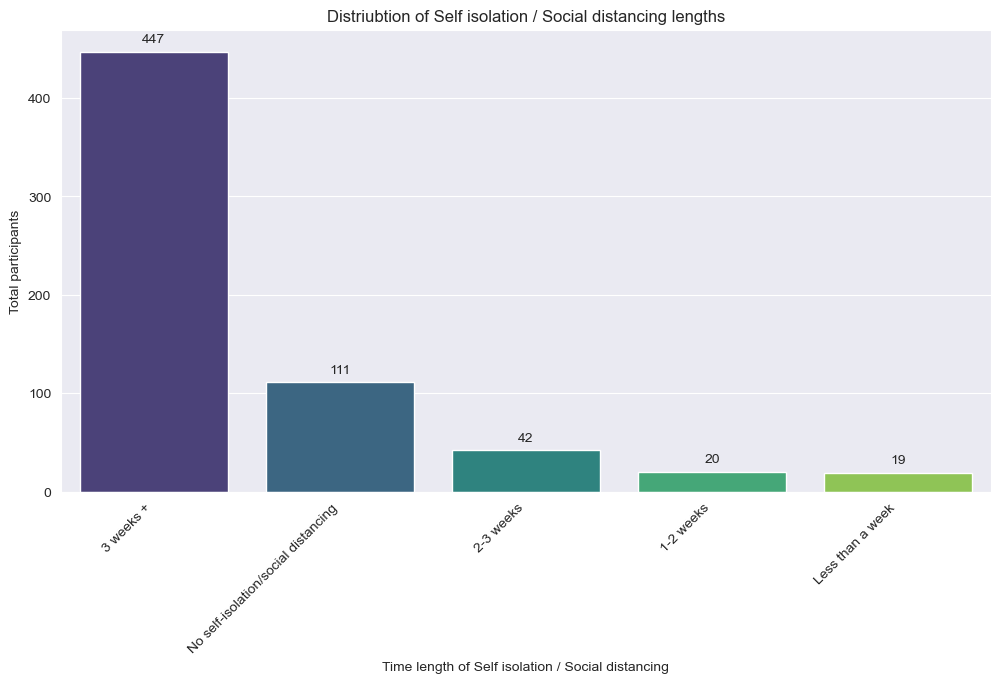

In [20]:
self_isototals = new_frame5['Length of SelfI/SocDis'].value_counts()

plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
ax = sns.barplot(x=self_isototals.index, y=self_isototals.values, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Distriubtion of Self isolation / Social distancing lengths')
plt.xlabel('Time length of Self isolation / Social distancing')
plt.ylabel('Total participants')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

reigion    Length of SelfI/SocDis             
Asia       3 weeks +                              120
           No self-isolation/social distancing     45
           Less than a week                         7
           1-2 weeks                                4
           2-3 weeks                                3
EU         3 weeks +                               71
           No self-isolation/social distancing     12
           2-3 weeks                                7
           Less than a week                         2
Other      3 weeks +                               12
           No self-isolation/social distancing      3
           1-2 weeks                                1
US/Canada  3 weeks +                              244
           No self-isolation/social distancing     51
           2-3 weeks                               32
           1-2 weeks                               15
           Less than a week                        10
Name: count, dtype: int64


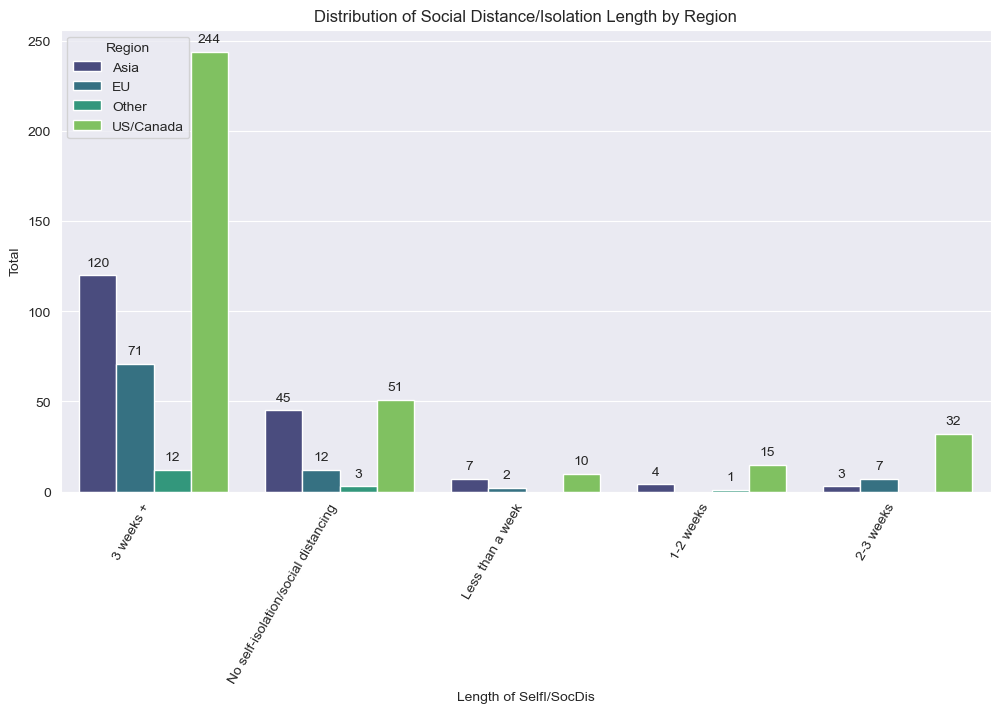

In [25]:
totals_by_region = new_frame5.groupby('reigion')['Length of SelfI/SocDis'].value_counts()
totals_by_region_df = totals_by_region.reset_index(name='count')
totals_by_region_df.columns = ['reigion', 'Length of SelfI/SocDis', 'total']
print(totals_by_region)

plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')

# Use hue to differentiate regions
region_plot = sns.barplot(data=totals_by_region_df, x='Length of SelfI/SocDis', y='total', hue='reigion', palette='viridis')

plt.title('Distribution of Social Distance/Isolation Length by Region')
plt.xlabel('Length of SelfI/SocDis')
plt.ylabel('Total')
plt.xticks(rotation=60, ha='right')
plt.legend(title='Region')

for p in region_plot.patches:
    region_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
plt.show()

In [22]:
unique_view = new_frame5['Length of SelfI/SocDis'].unique()
print(unique_view, sep='\n')

['3 weeks +' 'No self-isolation/social distancing' '2-3 weeks' '1-2 weeks'
 'Less than a week']


In [27]:
unique_freq = new_frame5['Playing frequency'].unique()
print(unique_freq, sep='\n')

['Almost everyday' 'Everyday' 'Every week' 'Almost every week'
 'Less than every month' 'Every month']
